PCA:
The dataset can be downloaded from Kaggle: https://www.kaggle.com/sakshigoyal7/credit-card-customers

The problem setting concerns with a bank’s customer churning rate. Suppose the bank’s manager is alerted that more customers are leaving their current credit card services and want to predict who is going to get churned so that they can proactively take action to retain customers.
This dataset consists of 10,000 customers, with 18 features, but in this analysis we will avoid using categorical features and use a subset of 11 numerical features to make the pre-processing simpler.
The targeted variable that we’re trying to predict is ‘Attrition_Flag’, with 84% of customers being Existing Customer and 16% being ‘Attrited Customer’.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('/content/BankChurners.csv')

# Select numerical features
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                      'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                      'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt']

# Filter the data
data_numerical = data[numerical_features]


In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)


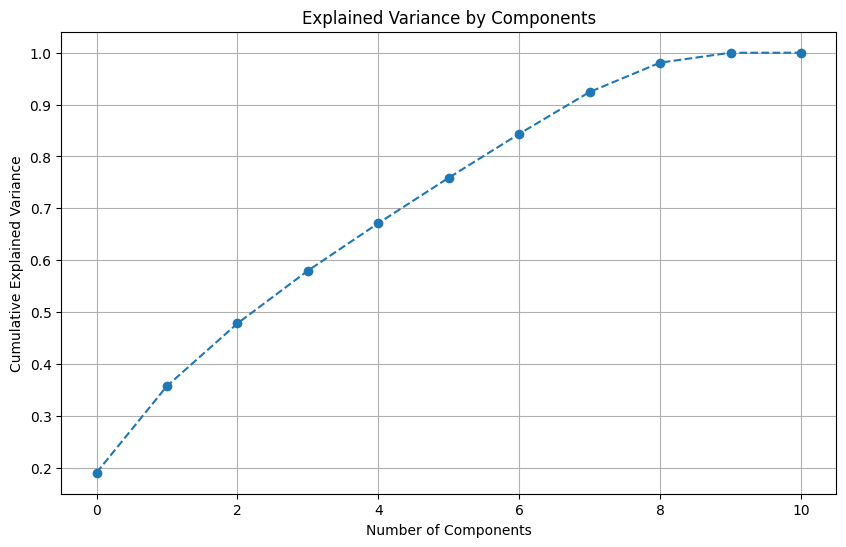

In [ ]:
# Apply PCA
pca = PCA()
pca.fit(data_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


In [ ]:
# Select the number of components
n_components = 6  # Example: Selecting the first 6 principal components

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])


In [ ]:
# Target variable
target = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(principal_df, target, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.8687068114511353
Confusion Matrix:
[[1675   24]
 [ 242   85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1699
           1       0.78      0.26      0.39       327

    accuracy                           0.87      2026
   macro avg       0.83      0.62      0.66      2026
weighted avg       0.86      0.87      0.84      2026



Logistic Regression:
Data Set: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

The dataset has health information regarding various individuals and whether they had a heart stroke. The idea is to build a classification model based on an individual’s health information and predict whether they will have a stroke.
The data is split so that 95% of the data will be used for training and testing the model, whereas the remaining 5% will act as the serving data.

In [ ]:
from sklearn.impute import SimpleImputer

# Load the dataset
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Drop the 'id' column
stroke_data.drop('id', axis=1, inplace=True)

# Convert categorical columns to numerical using one-hot encoding
stroke_data = pd.get_dummies(stroke_data, drop_first=True)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(stroke_data.drop('stroke', axis=1))
y = stroke_data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.05, random_state=42)


In [ ]:
# Logistic Regression Model
stroke_model = LogisticRegression(max_iter=10000)
stroke_model.fit(X_train, y_train)

# Predictions
y_pred_stroke = stroke_model.predict(X_test)

# Evaluate the model
accuracy_stroke = accuracy_score(y_test, y_pred_stroke)
conf_matrix_stroke = confusion_matrix(y_test, y_pred_stroke)
class_report_stroke = classification_report(y_test, y_pred_stroke)

print(f'Accuracy: {accuracy_stroke}')
print(f'Confusion Matrix:\n{conf_matrix_stroke}')
print(f'Classification Report:\n{class_report_stroke}')


Accuracy: 0.9296875
Confusion Matrix:
[[238   0]
 [ 18   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       238
           1       0.00      0.00      0.00        18

    accuracy                           0.93       256
   macro avg       0.46      0.50      0.48       256
weighted avg       0.86      0.93      0.90       256



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
